In [ ]:
Name: Prerana Gajare Roll No. TI50
    
Group B: Assignments based on Data Analytics using Python
Perform the following operations using Python on the Air quality and Heart Diseases data sets
a. Data cleaning

b. Data integration

c. Data transformation

d. Error correcting

e. Data model building

In [1]:
pip install chart-studio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
%matplotlib inline

In [3]:
data=pd.read_csv('India Air Quality Data.csv')
data.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\1023596283.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('India Air Quality Data.csv')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,01-02-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,01-02-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,01-02-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,01-03-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,01-03-1990


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [10]:
data=data.drop(['stn_code','agency','sampling_date','location_monitoring_station'], axis = 1)
#dropping columns that aren't required
#data=data.dropna(subset=['date']) # dropping rows where no date is available

KeyError: "['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'] not found in axis"

In [12]:
# defining columns of importance, which shall be used reguarly
COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
from sklearn.impute import SimpleImputer
# invoking SimpleImputer to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data[COLS] = imputer.fit_transform(data[COLS])

In [5]:
replacements = {
   'state': {
      r'Uttaranchal': 'Uttarakhand', 
   }
}

data.replace(replacements, regex=True, inplace=True)

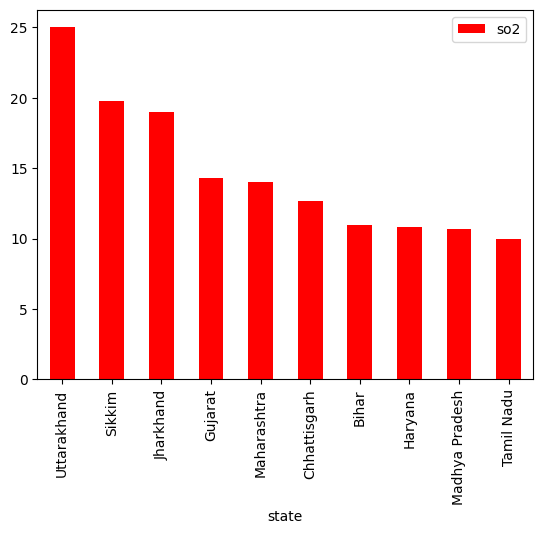

In [6]:
#TOP 10 -SO2
data[['so2','state']].groupby(["state"]).median().sort_values(by='so2',ascending=False).head(10).plot.bar(color='r')
plt.show()

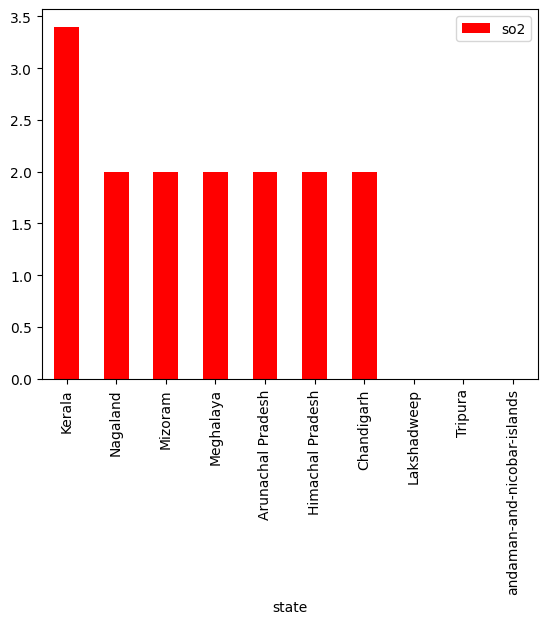

In [7]:
#BOTTOM 10 -SO2
data[['so2','state']].groupby(["state"]).median().sort_values(by='so2',ascending=False).tail(10).plot.bar(color='r')
plt.show()


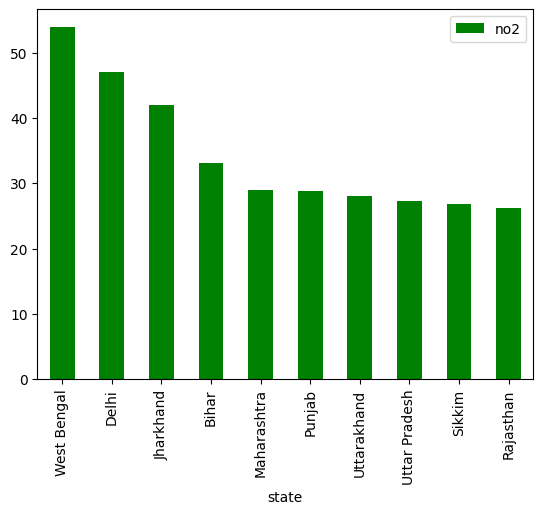

In [8]:
#TOP 10 - NO2
data[['no2','state']].groupby(["state"]).median().sort_values(by='no2',ascending=False).head(10).plot.bar(color='g')
plt.show()

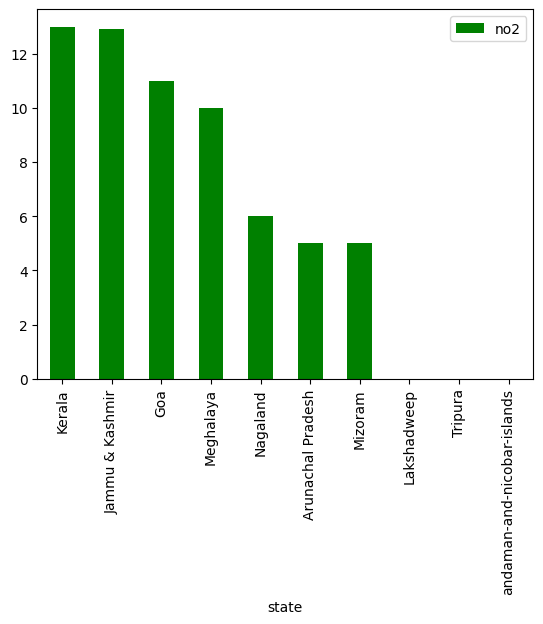

In [9]:
#BOTTOM 10 - NO2
data[['no2','state']].groupby(["state"]).median().sort_values(by='no2',ascending=False).tail(10).plot.bar(color='g')
plt.show()

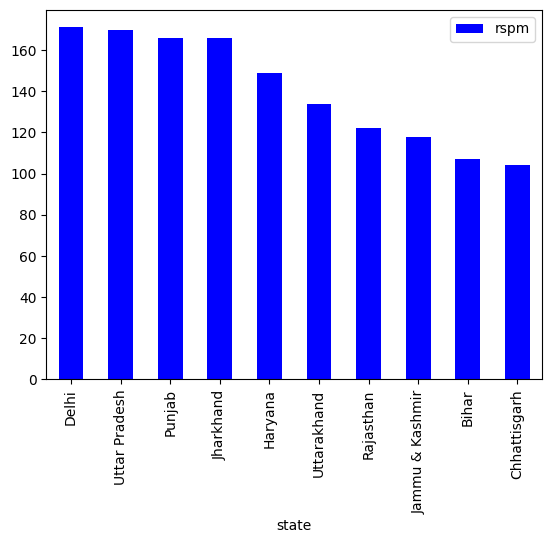

In [10]:
#TOP 10 - RSPM
data[['rspm','state']].groupby(["state"]).median().sort_values(by='rspm',ascending=False).head(10).plot.bar(color='b')
plt.show()

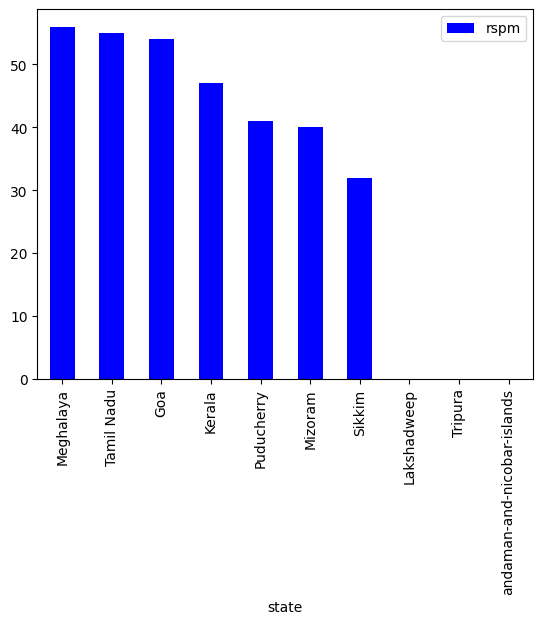

In [11]:
#BOTTOM 10 RSPM
data[['rspm','state']].groupby(["state"]).median().sort_values(by='rspm',ascending=False).tail(10).plot.bar(color='b')
plt.show()

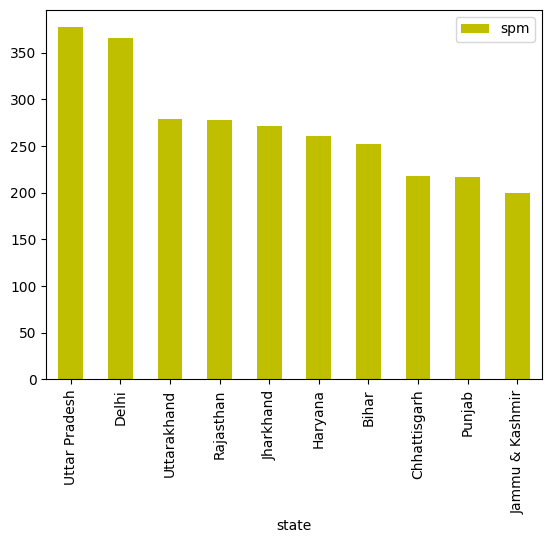

In [12]:
#TOP 10 - SPM
data[['spm','state']].groupby(["state"]).median().sort_values(by='spm',ascending=False).head(10).plot.bar(color='y')
plt.show()

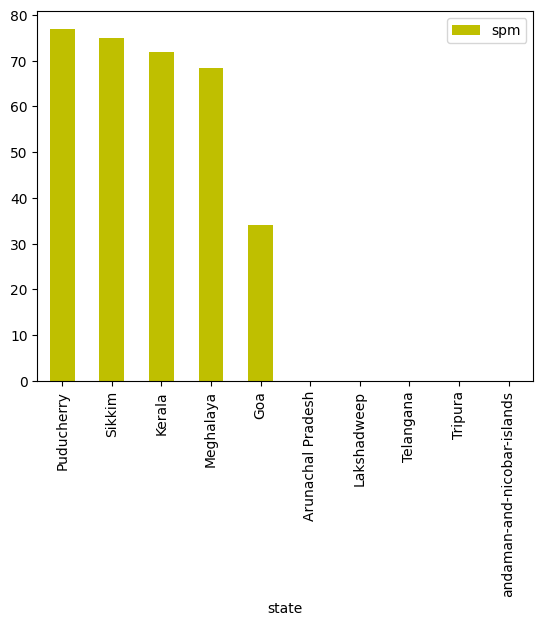

In [13]:
#BOTTOM 10 -SPM
data[['spm','state']].groupby(["state"]).median().sort_values(by='spm',ascending=False).tail(10).plot.bar(color='y')
plt.show()

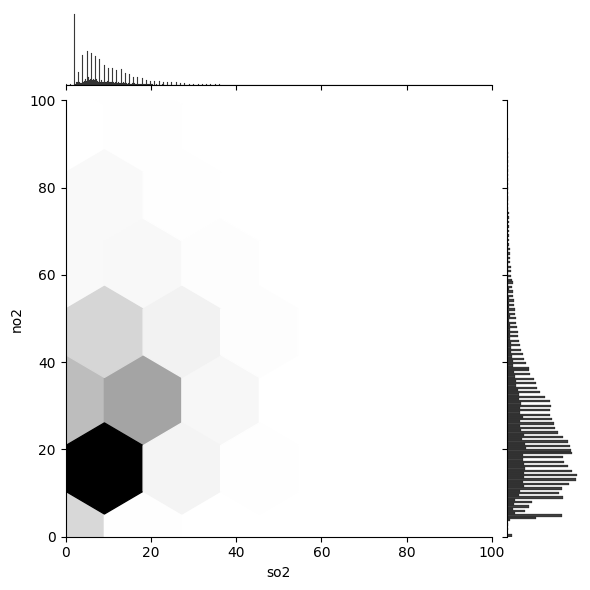

In [14]:
#Exploring relationship between proportion of Sulphur dioxide & Nitrogen dioxide
#sns.lmplot(x='so2',y='no2',data=data)
sns.jointplot(x='so2', y='no2', data=data,kind='hex',color='k',xlim={0,100}, ylim={0,100})

In [15]:
data['date'] = pd.to_datetime(data['date'],format='%d-%m-%Y') # date parse
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

C:\Users\Dell\AppData\Local\Temp\ipykernel_4012\720439431.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data[['so2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)


<AxesSubplot: xlabel='year', ylabel='so2'>

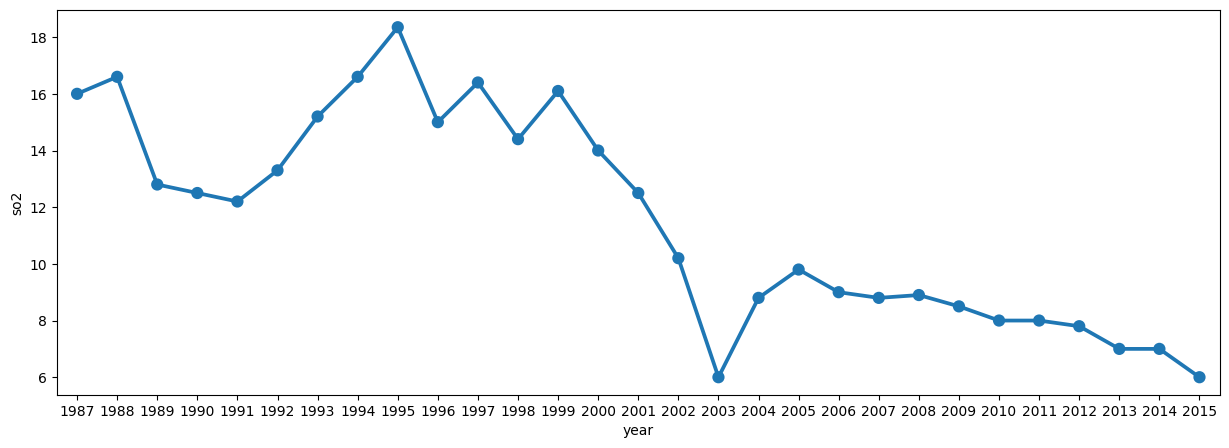

In [16]:
#SO2 Analysis
df = data[['so2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='so2', data=df)

<AxesSubplot: title={'center': 'so2 by state and year'}, xlabel='year', ylabel='state'>

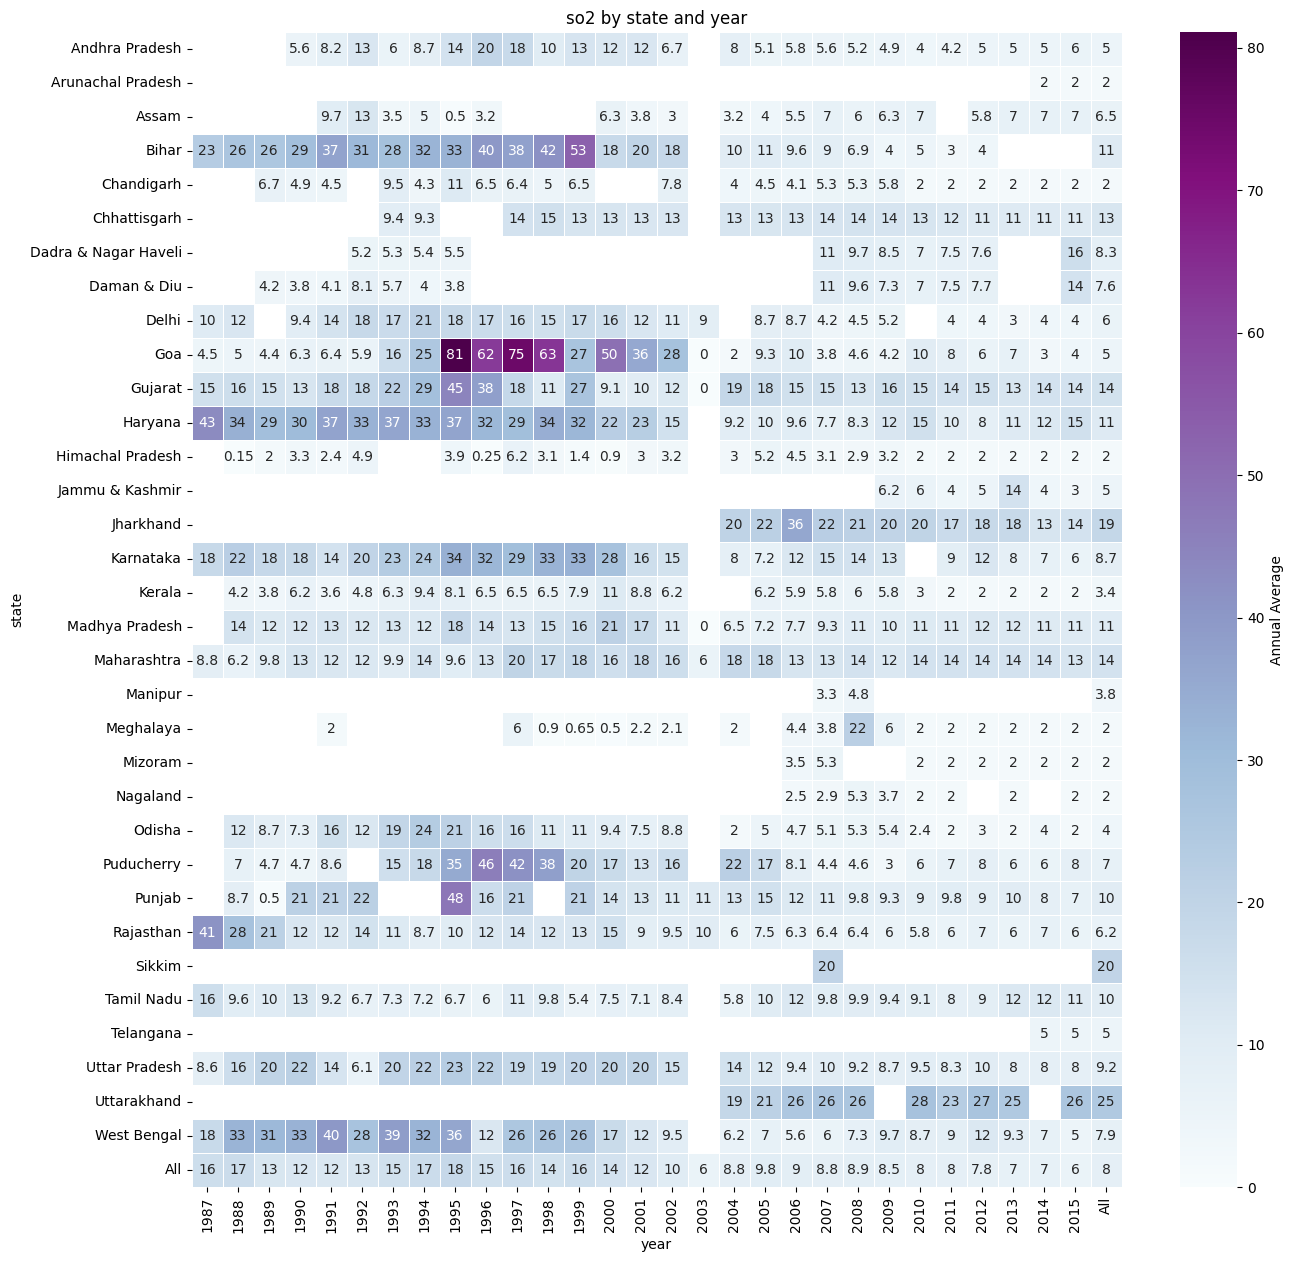

In [17]:
#Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize=(15,15))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(data.pivot_table('so2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot=True,cmap="BuPu", linewidths=.5, ax=ax,cbar_kws={'label': 'Annual Average'})

C:\Users\Dell\AppData\Local\Temp\ipykernel_4012\1413767912.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data[['no2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)


<AxesSubplot: xlabel='year', ylabel='no2'>

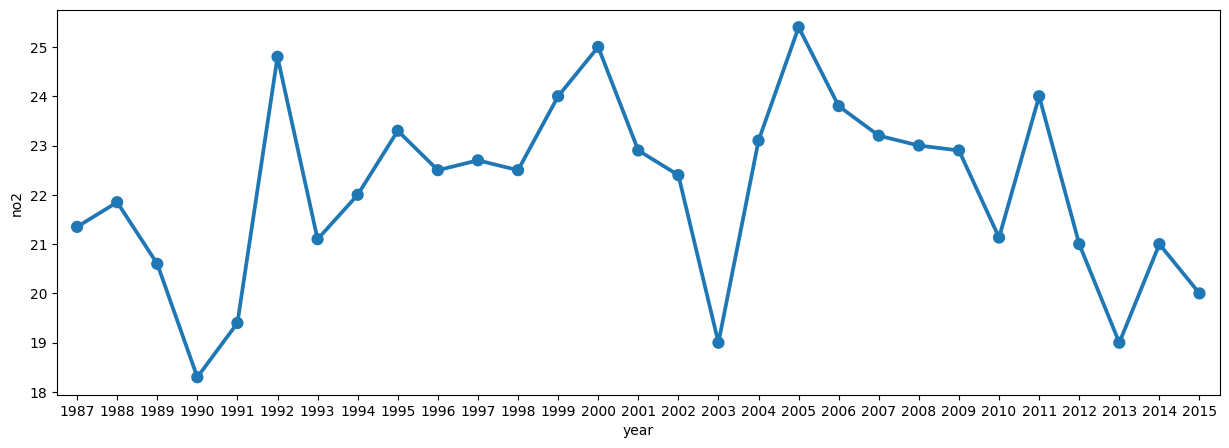

In [18]:
#NO2 Analysis
df = data[['no2','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='no2', data=df)

<AxesSubplot: title={'center': 'no2 by state and year'}, xlabel='year', ylabel='state'>

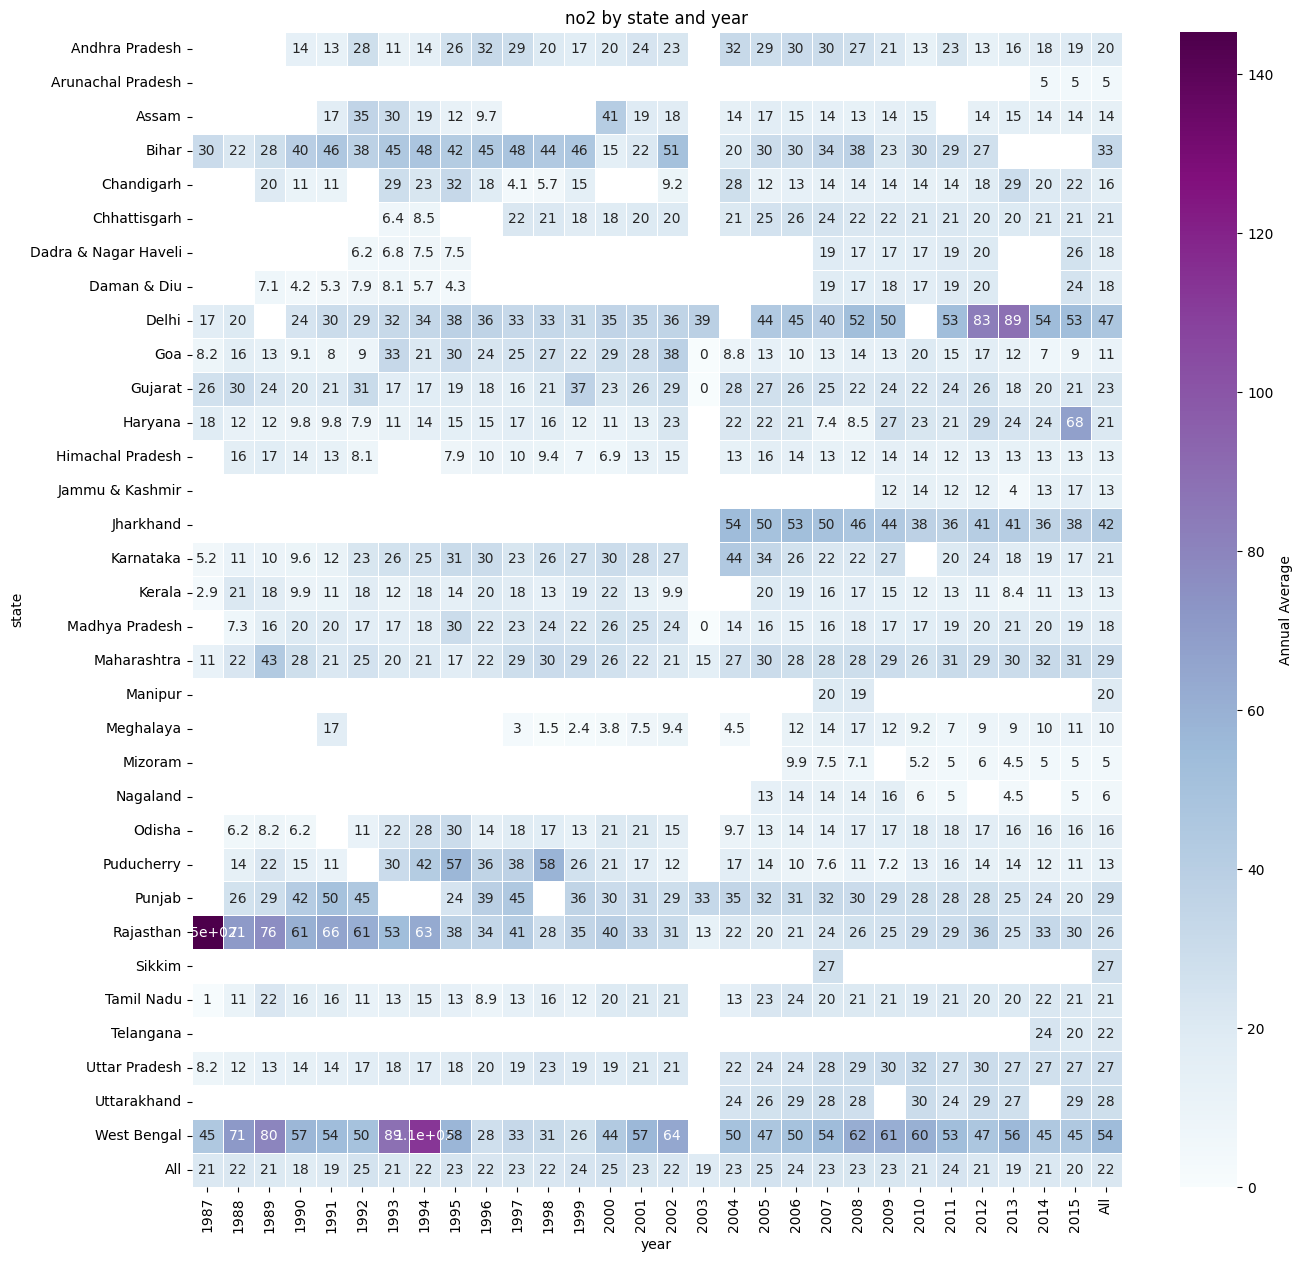

In [19]:
#Heatmap Pivot with State as Row, Year as Col, So2 as Value
f, ax = plt.subplots(figsize=(15,15))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(data.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot=True,cmap="BuPu", linewidths=.5, ax=ax,cbar_kws={'label': 'Annual Average'})